In [ ]:
import pandas as pd
import os

os.chdir('/home/aoviedomadr/redes_coregulación/RNACOREX/RNACOREX2.0')
data_complete = pd.read_csv('Data/data_complete.csv', index_col = 0)
data_def = pd.read_csv('data_def.csv', index_col = 0)

In [23]:
import os

os.chdir('/home/aoviedomadr/redes_coregulación/RNACOREX/RNACOREX2.0')

import RNACOREX
import pandas as pd
import importlib
import StrucInformation
import CLGStructure
import InitModel
from sklearn.model_selection import train_test_split

importlib.reload(RNACOREX)
importlib.reload(StrucInformation)
importlib.reload(CLGStructure)
importlib.reload(InitModel)

data = pd.read_csv('data_def.csv', index_col = 0)

X = data.drop('Class', axis = 1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rnacorex = RNACOREX.RNACOREX(n_con = 150, precision=10)

rnacorex.fit(X_train, y_train)

rl = rnacorex.predict(X_test)

USING DEFAULT ENGINE
Counter({'mRNA': 779, 'lncRNA': 361, 'miRNA': 103})


Calculating mutual information:   2%|▏         | 767/35234 [1:09:07<51:46:15,  5.41s/it]


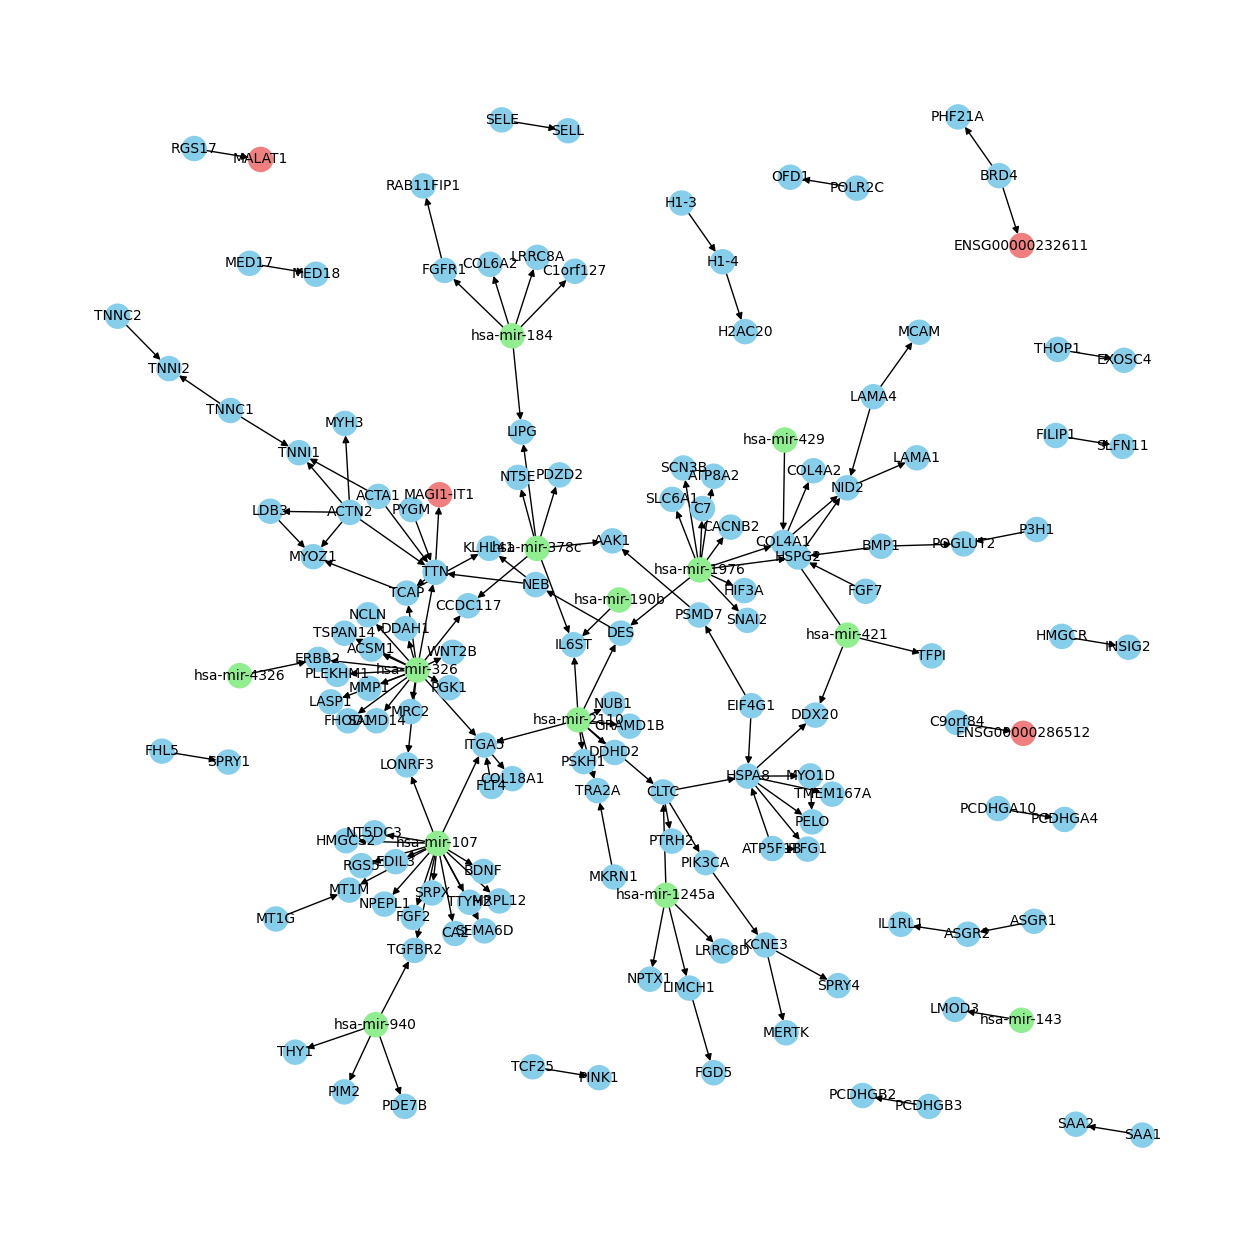

In [32]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

G = rnacorex.models_[150]['G']

plt.figure(figsize=(16, 16))

pos = graphviz_layout(G, prog='neato')

node_colors = [G.nodes[node]["color"] for node in G.nodes]

nx.draw_networkx_nodes(G, pos, node_color=node_colors)

nx.draw_networkx_edges(G, pos)

nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.axis('off')
plt.show()

In [6]:
cycles = list(nx.simple_cycles(rnacorex.models_[150]['G']))  # For directed graphs
print(cycles)

[['MALAT1', 'hsa-mir-146a']]
